In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Tasks**
- Plot the ECG and PPG data
- Calculate the Standard Deviation of the RRIs (the time interval in milliseconds, between successsive R-wave peaks) (in the polarHRM.csv)
- Try some of the processing techniques, like IIR and FIR filters, bandpass filtering, etc
- Find peaks within the signal

### **Load Bangle Data**

In [9]:
bangle_data = pd.read_csv("HRV-data/bangle.csv")
print(bangle_data.head())

    timestamp_ms  value
0  1724074011462   4334
1  1724074011481   4286
2  1724074011501   4222
3  1724074011520   4174
4  1724074011540   4094


### **Plot Bangle Data**

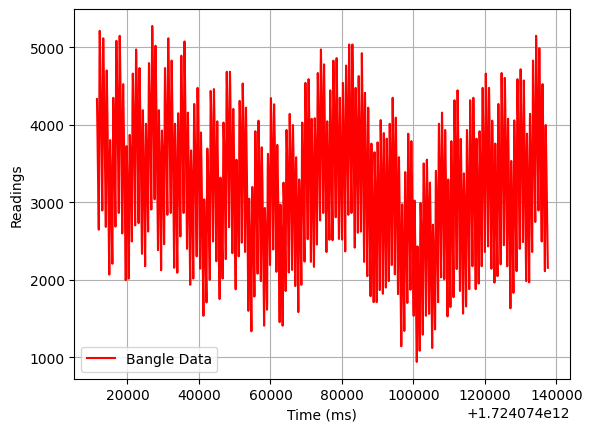

In [61]:
x_axis = bangle_data["timestamp_ms"]
y_axis = bangle_data["value"]

plt.plot(x_axis, y_axis, c='r', label="Bangle Data")
plt.legend()
plt.grid(True, 'both', 'both')
plt.xlabel("Time (ms)")
plt.ylabel("Readings")
plt.show()

### **Load Polar Data**

In [6]:
polar_data = pd.read_csv("HRV-data/polar.csv")
print(polar_data.head())

   timestamp_ms  value
0  5.996162e+11     19
1  5.996162e+11     19
2  5.996162e+11     16
3  5.996162e+11     21
4  5.996162e+11     30


### **Plot Polar Data**

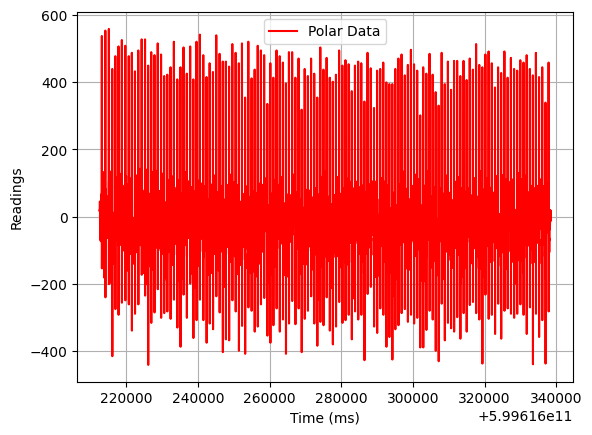

In [60]:
x_axis = polar_data["timestamp_ms"]
y_axis = polar_data["value"]

plt.plot(x_axis, y_axis, c='r', label="Polar Data")
plt.legend()
plt.grid(True, 'both', 'both')
plt.xlabel("Time (ms)")
plt.ylabel("Readings")
plt.show()

### **Load PolarHRM Data**

In [5]:
polarHRM_data = pd.read_csv("HRV-data/polarHRM.csv")
print(polarHRM_data.head())

    timestamp_ms  value        rris
0  1724074012500     65  880.859375
1  1724074013491     65  873.046875
2  1724074014481     65  962.890625
3  1724074015516     65  981.445312
4  1724074016506     65  975.585938


**Note:**
- Issue with polarHRM.csv, as it had 4 columns/features for some of data samples (rows), which was causing errors when loading the data. 
- Why is this the case? As we should identify the issue, as it could lead to problems when working with larger datasets, as this one is only a 2 minute reading.
- I've manually fixed it for now, by editing that 4th column on the CSV file. But we should still identify the root of the issue, and why it is happening.

### **Plot PolarHRM Data**

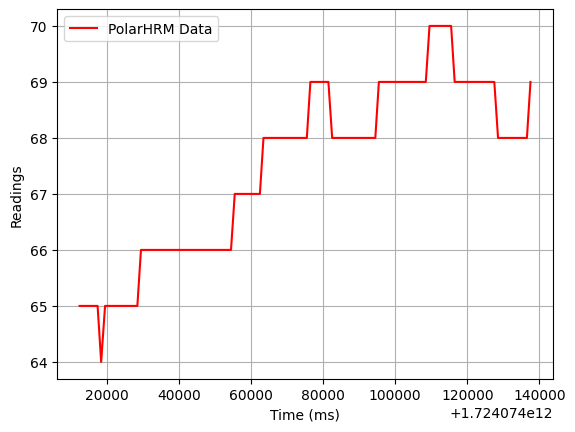

In [59]:
x_axis = polarHRM_data["timestamp_ms"]
y_axis = polarHRM_data["value"]

plt.plot(x_axis, y_axis, c='r', label="PolarHRM Data")
plt.legend()
plt.grid(True, 'both', 'both')
plt.xlabel("Time (ms)")
plt.ylabel("Readings")
plt.show()

### **Find Standard Deviation of RRIs in the PolarHRM Data**

In [41]:
rris_column = polarHRM_data.iloc[:, 2]
print(f"RRIs Data from PolarHRM: \n{rris_column}\n")

rris_array = rris_column.to_numpy()
print(f"RRIs Data in ndarray Object: \n{rris_array}\n")
print(f"Shape of the RRIs Array: \n{rris_array.shape}\n")

RRIs Data from PolarHRM: 
0      880.859375
1      873.046875
2      962.890625
3      981.445312
4      975.585938
          ...    
121    885.742188
122    890.625000
123    845.703125
124    875.000000
125    892.578125
Name: rris, Length: 126, dtype: float64

RRIs Data in ndarray Object: 
[880.859375  873.046875  962.890625  981.4453125 975.5859375 950.1953125
 865.234375  875.9765625 939.453125  963.8671875 958.984375  865.234375
 937.5       942.3828125 942.3828125 870.1171875 854.4921875 904.296875
 916.9921875 929.6875    866.2109375 911.1328125 940.4296875 949.21875
 874.0234375 875.9765625 908.203125  940.4296875 879.8828125 883.7890625
 944.3359375 908.203125  869.140625  925.78125   923.828125  923.828125
 893.5546875 854.4921875 902.34375   907.2265625 901.3671875 871.09375
 873.046875  898.4375    904.296875  863.28125   859.375     883.7890625
 885.7421875 837.890625  840.8203125 889.6484375 892.578125  887.6953125
 845.703125  890.625     901.3671875 893.5546875 859.37

In [45]:
std_rris = np.std(rris_array)
SDNN = std_rris
print(f"Standard Deviation of RR Intervals in PolarHRM Data: {SDNN:.3f}")

Standard Deviation of RR Intervals in PolarHRM Data: 32.045


### **Plot of RR Intervals against Time**

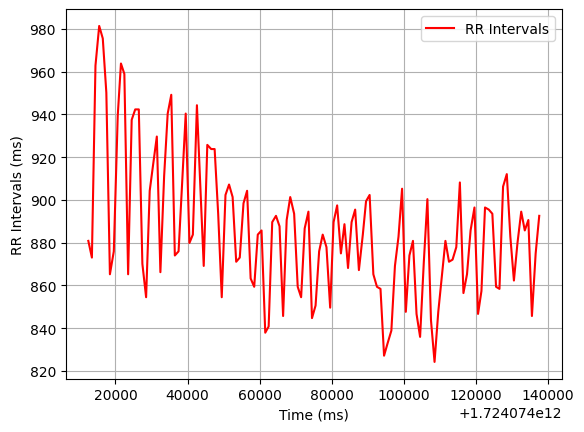

In [53]:
plt.plot(x_axis, rris_column, c='r', label='RR Intervals')
plt.ylabel("RR Intervals (ms)")
plt.xlabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()

### **The RMSSD (Root Mean Square of Successive Differences) Is Defined As:**

$$
\mathrm{RMSSD} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N-1} \bigl(RR_{i+1} - RR_i\bigr)^2}
$$

- **\(RR_i\): the \(i\)-th successive R–R interval (in milliseconds)**
- **\(N\): total number of R–R intervals**

In [75]:
rris = rris_column.to_numpy()
diff_rris = np.diff(rris)
rmssd = np.sqrt(np.mean(diff_rris ** 2))
print(f"RMSSD: {rmssd:.2f} milliseconds")

RMSSD: 32.63 milliseconds


### **The pNN50 (percentage of successive RR-interval differences greater than 50 ms) Is Defined As:**

$$
\mathrm{pNN50} = \frac{\displaystyle\sum_{i=1}^{N-1} \mathbb{I}\bigl(\lvert RR_{i+1} - RR_{i}\rvert > 50\text{ ms}\bigr)}{N - 1} \times 100\%
$$

- **\(RR_i\): the \(i\)-th successive R–R interval (in milliseconds)**
- **\(N\): total number of R–R intervals**
- **1 if condition is True, 0 otherwise**

In [76]:
pnn50 = (np.sum(np.abs(diff_rris) > 50) / len(diff_rris)) * 100
print(f"pnn50: {pnn50:.2f}%")

pnn50: 11.20%


### **Histogram of RR Intervals**

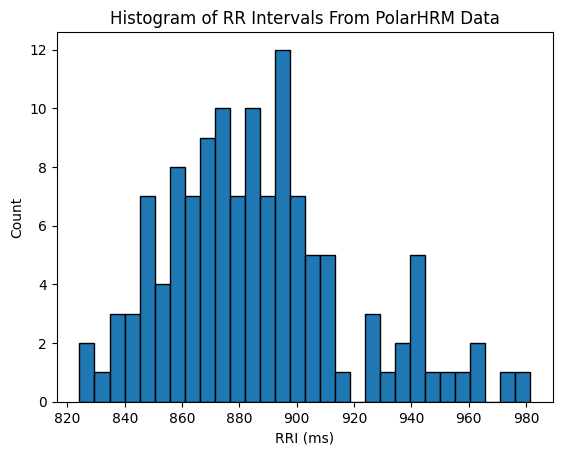

In [85]:
plt.hist(rris, bins=30, edgecolor='k')
plt.ylabel("Count")
plt.xlabel("RRI (ms)")
plt.title("Histogram of RR Intervals From PolarHRM Data")
plt.show()

### **Estimating PPG Sampling Rate For Filter Design**
- _Higher sampling rate means more data points are captured, allowing for higher resolution of data, and greater analysis of physiological parameters_
- _Sampling frequency simply means how many samples per second_
- _Knowing the sampling frequency, tells us the time resolution of the PPG signal_
- _Suppose a sampling frequency of 25 Hz would mean one reading every 0.04 seconds_
- _How many times per second a signal is snapshot/captured_

### Formulas

**Given timestamps \(t_0, t_1, \dots, t_{N-1}\) in milliseconds:**

1. **Inter-sample intervals** (in seconds):

$$
\Delta t_i = \frac{t_{i+1} - t_i}{1000}, \quad
i = 0,1,\dots,N-2
$$

2. **Mean sampling interval**:

$$
\overline{\Delta t} = \frac{1}{N-1} \sum_{i=0}^{N-2} \Delta t_i
$$

3. **Sampling frequency** (Hz):

$$
f_s = \frac{1}{\overline{\Delta t}}
$$

In [92]:
timestamps = bangle_data["timestamp_ms"].to_numpy()
dt = np.diff(timestamps) / 1000.0
fs = 1 / np.mean(dt)
print(f"Estimated PPG sampling rate: {fs:.1f} Hz")

Estimated PPG sampling rate: 43.9 Hz


### **Creating a Band-pass filter and Identifying Peaks**
- _Blocking out frequencies below 0.5 Hz, as that falls under baseline drift (the value a signal exhibits, when no significant change or event is present, essentially the "resting state" of a signal)_
- _Blocking out frequencies above 8 Hz, as those fall under the category of non-cardiac signals or **HIGH FREQUENCY NOISE**_
- _Designing a 3rd order butterworth bandpass filter for pass-band of [0.5, 8]_

In [96]:
from scipy.signal import butter, filtfilt, find_peaks

lowcut, highcut = 0.5, 8.0
nyq = 0.5 * fs
b, a = butter(3, [lowcut/nyq, highcut/nyq], btype='band')  # Getting numerator b, and denominator a polynomials for the 3rd order IIR filter

ppg = bangle_data["value"].to_numpy()  # The raw PPG amplitude vector
'filtfilt() applies zero-phase filtering, allowing us to keep the peaks aligned with the raw signal'
ppg_filt = filtfilt(b, a, ppg)  # filtering the raw PPG according to the coefficients from the Butterworth band-pass filter

min_dist = int(0.5 * fs) # the standard formula
peaks, props = find_peaks(ppg_filt, distance=min_dist, height=np.mean(ppg_filt))

### **Plotting Results**

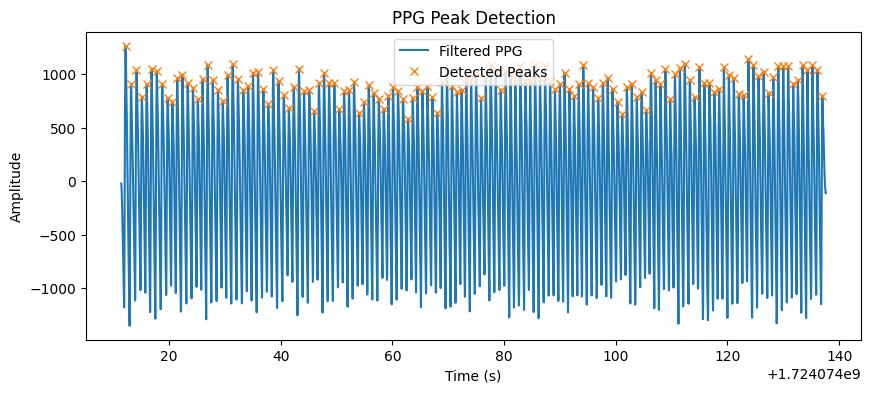

Detected 142 peaks in PPG; PolarHRM has 126 beats.


In [95]:
plt.figure(figsize=(10,4))
t_sec = timestamps / 1000.0
plt.plot(t_sec, ppg_filt, label="Filtered PPG")
plt.plot(t_sec[peaks], ppg_filt[peaks], 'x', label="Detected Peaks")
plt.title("PPG Peak Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

print(f"Detected {len(peaks)} peaks in PPG; PolarHRM has {len(rris)} beats.")